In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import StandardScaler


In [ ]:

data = pd.read_csv('./dataset_Facebook.csv',sep=';')

In [ ]:
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
data.iloc[:5,:5]

,Page total likes,Type,Category,Post Month,Post Weekday
0,139441,Photo,2,12,4
1,139441,Status,2,12,3
2,139441,Photo,3,12,3
3,139441,Photo,2,12,2
4,139441,Photo,2,12,2


In [ ]:
data.isnull()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


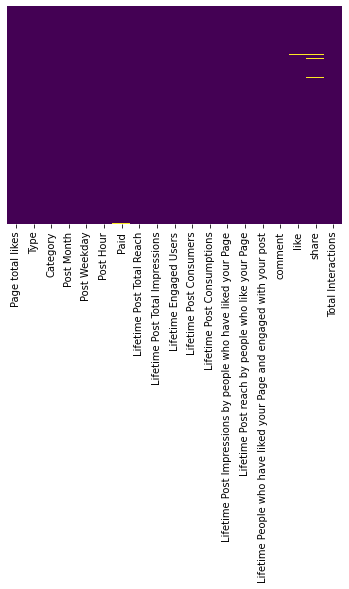

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

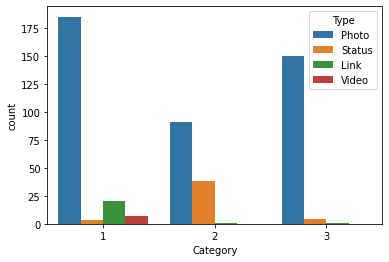

In [ ]:
sns.countplot(x='Category',hue='Type',data=data,)

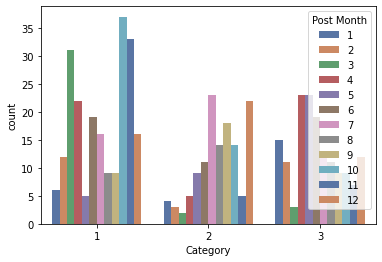

In [ ]:
sns.countplot(x='Category',hue='Post Month',data=data,palette='deep')

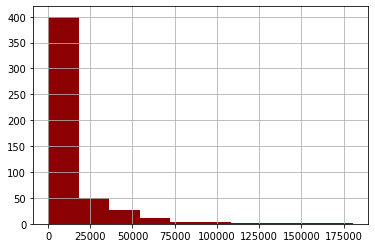

In [ ]:
data['Lifetime Post Total Reach'].hist(bins=10,color='darkred')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [ ]:
data['Category'].value_counts()

1    215
3    155
2    130
Name: Category, dtype: int64

In [ ]:
data['Post Month'].value_counts()

10    60
7     52
12    50
4     50
6     49
11    45
5     37
9     36
3     36
8     34
2     26
1     25
Name: Post Month, dtype: int64

# PCA

In [ ]:
categorical_data = ['Type','Category','Post Month',	'Post Weekday',	'Post Hour','Paid']

In [ ]:
data_pca = data.drop(columns=categorical_data)

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(data_pca.corr(),annot=True,cbar=True,cmap='YlOrBr')

In [ ]:
scaler = StandardScaler()
scaler.fit(data_pca)
data_std = pd.DataFrame( scaler.transform(data_pca),columns=data_pca.columns)

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(data_std.corr(),annot=True,cbar=True,cmap='YlOrBr')

In [ ]:
e_values , e_vectors = np.linalg.eig(data_std.cov().values)

In [ ]:
plt.plot(sorted(e_values,reverse=True))

In [ ]:
np.sum(e_values[:7])/np.sum(e_values)

The 13 features ( Excluding categorical data )  can be approximated to 7 features which contribute to almost 97% of the feature data 

## Pre-processing
Removing rows with missing information

In [ ]:
data.dropna(inplace=True)

## Regression

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest

#### Preprocessing for Regression

Removing Outliers

In [ ]:
outlier=np.percentile(data['Lifetime Post Total Reach'],90)
outlier

37260.8

In [ ]:
df = data[data['Lifetime Post Total Reach']<outlier]

In [ ]:
def Weekday(x):
    if x == 1:
        return 'Sunday'
    elif x== 2:
        return 'Monday'
    elif x == 3:
        return 'Tuesday'
    elif x == 4:
        return 'Wednesday'
    elif x == 5:
        return 'Thursday'
    elif x ==6:
        return 'Friday'
    elif x == 7:
        return "Saturday"

data['Weekday'] = data['Post Weekday'].apply(lambda x: Weekday(x))

In [ ]:
df = pd.concat([df,pd.get_dummies(df['Weekday'])],axis=1)

In [ ]:
df = pd.concat([df,pd.get_dummies(df['Post Hour'],prefix='hour')],axis=1)
df = pd.concat([df,pd.get_dummies(df['Post Month'],prefix='Month')],axis=1)
df['Video'] = pd.get_dummies(df['Type'])['Video']
df['Status'] = pd.get_dummies(df['Type'])['Status']
df['Photo'] = pd.get_dummies(df['Type'])['Photo']
df['Category_1'] = pd.get_dummies(df['Category'])[1]
df['Category_2'] = pd.get_dummies(df['Category'])[2]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445 entries, 0 to 498
Data columns (total 66 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     445 non-null    int64  
 1   Type                                                                 445 non-null    object 
 2   Category                                                             445 non-null    int64  
 3   Post Month                                                           445 non-null    int64  
 4   Post Weekday                                                         445 non-null    int64  
 5   Post Hour                                                            445 non-null    int64  
 6   Paid                                                                 445 non-null    float64
 7   Lifetime

### Model 1 - Lifetime engaged users

In [ ]:
x = df[['Page total likes','Paid','Video','Status','Photo','Total Interactions',
    'Category_1','Category_2','Monday','Tuesday','Wednesday',"Thursday",'Friday','Saturday','Sunday',
       'hour_17','hour_1','hour_2','hour_3','hour_4','hour_5', 'hour_6','hour_7','hour_8',
        'hour_9','hour_10','hour_11','hour_12','hour_13','hour_14','hour_15','hour_16',
        'hour_18','hour_19','hour_20','hour_22','hour_23',
        'Month_1','Month_2','Month_3','Month_4','Month_5','Month_6',
        'Month_7','Month_8','Month_9','Month_10','Month_11','Month_12']]


In [ ]:
y = df['Lifetime Engaged Users']

In [ ]:
bestAttributes = SelectKBest(k=49)
bestAttributes.fit(x,y)

SelectKBest(k=49, score_func=<function f_classif at 0x7f07abd08620>)

In [ ]:
temp = x.columns
new = [temp[i] for i in bestAttributes.get_support(indices=True)]

In [ ]:
x = df[new]
x_train,x_test,y_train, y_test = train_test_split(x,
                                                  y, test_size=0.1,
                                                  random_state=40)

In [ ]:
reg = linear_model.LinearRegression(normalize=True)
reg.fit(x_train,y_train)
lasso = linear_model.Lasso(normalize=True)
lasso.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [ ]:
lassoDF = pd.DataFrame()
lassoDF['Attribute'] = list(x_train.columns)
lassoDF['Importance'] = lasso.coef_
lassoDF

,Attribute,Importance
0,Page total likes,-0.005960
1,Paid,2.743453
2,Video,675.110241
3,Status,1339.185403
4,Photo,0.000000
5,Total Interactions,2.040928
6,Category_1,116.505171
7,Category_2,0.000000
8,Monday,-0.000000
9,Tuesday,91.245642


Regression Model

In [ ]:
def Regression(model,x_train= None,y_train=None, x_test=None,y_test=None,saveFig=False): 
    
    predicted_test = model.predict(x_test)
    test_score = r2_score(y_test, predicted_test)
    predicted_train = model.predict(x_train)
    train_score = r2_score(y_train, predicted_train)
    print(f'Train data R-2 score: {train_score}')
    print(' ')
    print(f'Test data R-2 score: {test_score}')
    
    DF = pd.DataFrame()
    DF['Score'] = [round(train_score,3),round(test_score,3),]
    DF['Step'] = ['train','test']
    DF['metric'] = ['r2','r2']

    #plotting results
    sns.pointplot(y=DF['Score'],x=DF['Step'],hue=DF['metric'])
    plt.ylim([-.1,1])
    plt.title('Model Scores')
    plt.show()

Train data R-2 score: 0.6671653776203927
 
Test data R-2 score: 0.6278126698598586


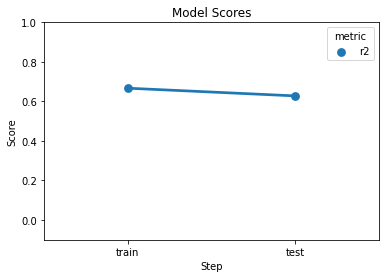

In [ ]:
linear = Regression(reg,x_test=x_test,x_train=x_train,y_test=y_test,y_train=y_train)

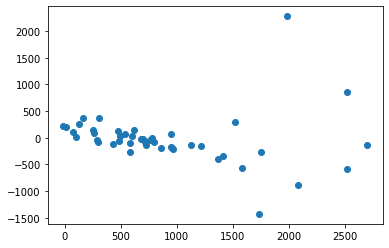

In [ ]:
pred = reg.predict(x_test)
error = y_test - pred
plt.scatter(pred, error)

In [ ]:
import statsmodels.api as sm

In [ ]:
x_train = sm.add_constant(x_train)
results = sm.OLS(y_train, x_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Lifetime Engaged Users   R-squared:                       0.667
Model:                                OLS   Adj. R-squared:                  0.624
Method:                     Least Squares   F-statistic:                     15.38
Date:                    Sun, 06 Dec 2020   Prob (F-statistic):           6.46e-60
Time:                            05:53:07   Log-Likelihood:                -2980.9
No. Observations:                     400   AIC:                             6056.
Df Residuals:                         353   BIC:                             6243.
Df Model:                              46                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3045.2940   1563.360      1.948      0.052     -29.378    6119.966
Page total likes      -0.0334      0.016     -2.025      0.044      -0.066      -0.001
Paid                  76.4977     53.539      1.429      0.154     -28.797     181.792
Video               1115.6397    239.128      4.665      0.000     645.346    1585.934
Status              1745.4417    146.620     11.905      0.000    1457.083    2033.800
Photo                332.6662    121.684      2.734      0.007      93.350     571.982
Total Interactions     2.2579      0.162     13.927      0.000       1.939       2.577
Category_1           302.0656     62.137      4.861      0.000     179.861     424.270
Category_2           103.3455     68.656      1.505      0.133     -31.681     238.373
Monday               387.9792    234.272      1.656      0.099     -72.765     848.724
Tuesday              589.4871    238.091      2.476      0.014     121.233    1057.741
Wednesday            265.7684    226.052      1.176      0.241    -178.811     710.347
Thursday             364.5726    230.071      1.585      0.114     -87.909     817.054
Friday               412.8564    227.315      1.816      0.070     -34.205     859.917
Saturday             524.3543    227.530      2.305      0.022      76.870     971.839
Sunday               500.2760    231.613      2.160      0.031      44.761     955.791
hour_17              315.9987    278.646      1.134      0.258    -232.016     864.013
hour_1               256.9258    266.436      0.964      0.336    -267.076     780.927
hour_2                65.2046    114.471      0.570      0.569    -159.927     290.336
hour_3                70.3722     93.450      0.753      0.452    -113.416     254.161
hour_4               -48.2134    118.607     -0.406      0.685    -281.479     185.052
hour_5               207.0717    148.843      1.391      0.165     -85.658     499.802
hour_6                57.5711    156.866      0.367      0.714    -250.939     366.081
hour_7               124.5070    161.562      0.771      0.441    -193.237     442.251
hour_8                19.8765    156.383      0.127      0.899    -287.683     327.436
hour_9               240.8969    116.594      2.066      0.040      11.590     470.204
hour_10              124.6202    100.697      1.238      0.217     -73.422     322.662
hour_11              118.6148    111.726      1.062      0.289    -101.118     338.347
hour_12              229.0369    130.269      1.758      0.080     -27.164     485.238
hour_13              146.7882    103.618      1.417      0.157     -56.998     350.574
hour_14              260.1270    174.352      1.492      0.137     -82.773     603.027
hour_15              -97.4306    219.824     -0.443      0.658    -529.760     33

### Model 2 - Features important for Page Likes

In [ ]:
x = df[['Paid','Video','Status','Photo','Total Interactions','Lifetime Post Total Reach','Lifetime Post Total Impressions',
        'Lifetime Engaged Users',
    'Category_1','Category_2','Monday','Tuesday','Wednesday',"Thursday",'Friday','Saturday','Sunday',
       'hour_17','hour_1','hour_2','hour_3','hour_4','hour_5', 'hour_6','hour_7','hour_8',
        'hour_9','hour_10','hour_11','hour_12','hour_13','hour_14','hour_15','hour_16',
        'hour_18','hour_19','hour_20','hour_22','hour_23',
        'Month_1','Month_2','Month_3','Month_4','Month_5','Month_6',
        'Month_7','Month_8','Month_9','Month_10','Month_11','Month_12']]

In [ ]:
y = df['Page total likes']

In [ ]:
bestAttributes = SelectKBest(k=8)
bestAttributes.fit(x,y)

SelectKBest(k=50, score_func=<function f_classif at 0x7f07abd08620>)

In [ ]:
temp = x.columns
new = [temp[i] for i in bestAttributes.get_support(indices=True)]

In [ ]:
x = df[new]
x_train,x_test,y_train, y_test = train_test_split(x,
                                                  y, test_size=0.1,
                                                  random_state=40)

In [ ]:
reg = linear_model.LinearRegression(normalize=True)
reg.fit(x_train,y_train)
lasso = linear_model.Lasso(normalize=True)
lasso.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [ ]:
lassoDF = pd.DataFrame()
lassoDF['Attribute'] = list(x_train.columns)
lassoDF['Importance'] = lasso.coef_
lassoDF

,Attribute,Importance
0,Month_1,-50083.171092
1,Month_2,-43180.228468
2,Month_3,-35160.034307
3,Month_4,-25117.756965
4,Month_5,-17741.667308
5,Month_6,-10490.066146
6,Month_7,-5853.955099
7,Month_12,3057.391592


In [ ]:
def Regression(model,x_train= None,y_train=None, x_test=None,y_test=None,saveFig=False): 
    
    predicted_test = model.predict(x_test)
    test_score = r2_score(y_test, predicted_test)
    predicted_train = model.predict(x_train)
    train_score = r2_score(y_train, predicted_train)
    print(f'Train data R-2 score: {train_score}')
    print(' ')
    print(f'Test data R-2 score: {test_score}')
    
    DF = pd.DataFrame()
    DF['Score'] = [round(train_score,3),round(test_score,3),]
    DF['Step'] = ['train','test']
    DF['metric'] = ['r2','r2']

    #plotting results
    sns.pointplot(y=DF['Score'],x=DF['Step'],hue=DF['metric'])
    plt.ylim([-.1,1])
    plt.title('Model Scores')
    plt.show()

Train data R-2 score: 0.9877562306855341
 
Test data R-2 score: 0.9885542124093482


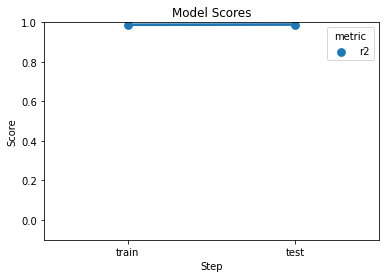

In [ ]:
linear = Regression(reg,x_test=x_test,x_train=x_train,y_test=y_test,y_train=y_train)

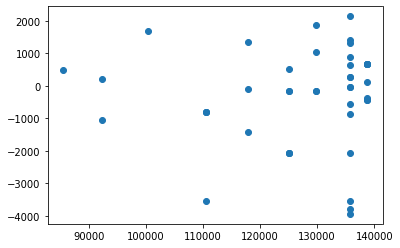

In [ ]:
pred = reg.predict(x_test)
error = y_test - pred
plt.scatter(pred, error)

In [ ]:
x_train = sm.add_constant(x_train)
results = sm.OLS(y_train, x_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Page total likes   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     3943.
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        06:06:00   Log-Likelihood:                -3568.4
No. Observations:                 400   AIC:                             7155.
Df Residuals:                     391   BIC:                             7191.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.357e+05    153.243    885.838      0.000    1.35e+05    1.36e+05
Month_1    -5.026e+04    437.482   -114.883      0.000   -5.11e+04   -4.94e+04
Month_2    -4.335e+04    428.246   -101.236      0.000   -4.42e+04   -4.25e+04
Month_3    -3.532e+04    358.365    -98.549      0.000    -3.6e+04   -3.46e+04
Month_4    -2.527e+04    331.043    -76.325      0.000   -2.59e+04   -2.46e+04
Month_5     -1.79e+04    363.057    -49.301      0.000   -1.86e+04   -1.72e+04
Month_6    -1.064e+04    341.709    -31.143      0.000   -1.13e+04   -9969.993
Month_7    -6002.8555    331.043    -18.133      0.000   -6653.703   -5352.008
Month_12    3030.2727    331.043      9.154      0.000    2379.425    3681.120
==============================================================================
Omnibus:                        4.464   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                4.210
Skew:                          -0.224   Prob(JB):                        0.122
Kurtosis:                       3.227   Cond. No.                         6.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## EDA

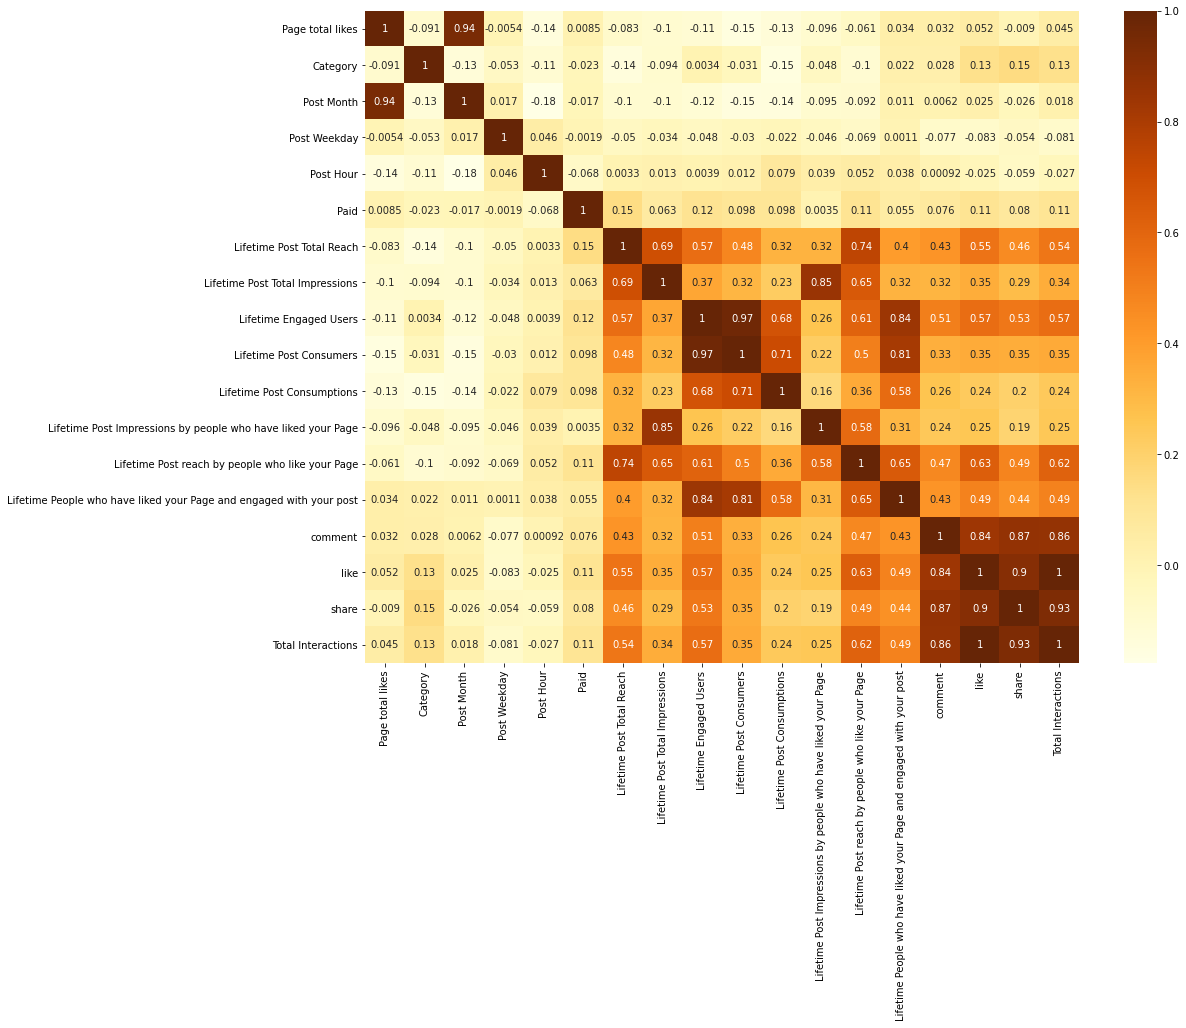

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(),annot=True,cbar=True,cmap='YlOrBr')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Page total likes')

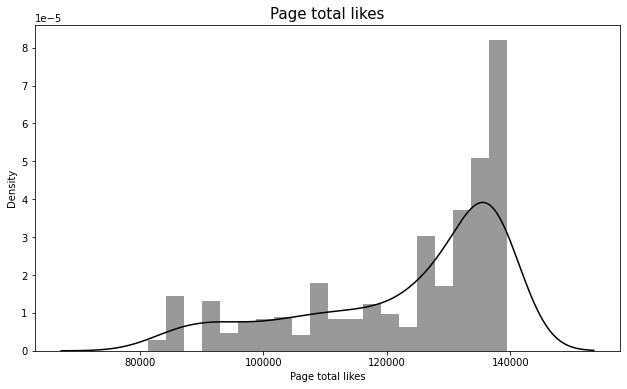

In [ ]:
plt.figure(figsize=(10.5,6))
sns.distplot(data['Page total likes'],bins=20,kde=True,color="black")
# plt.xlim([6000,14000])
plt.title("Page total likes",fontsize=15)

Text(0.5, 1.0, 'Like - Post')

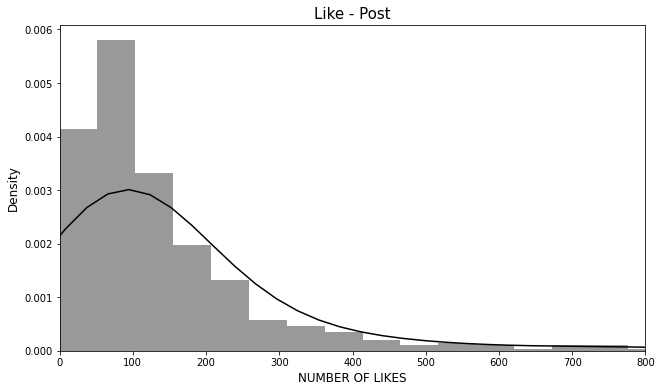

In [ ]:
plt.figure(figsize=(10.5,6))
sns.distplot(data['like'],bins=100,color='black',kde=True)
plt.xlim(0,800)
plt.xlabel("NUMBER OF LIKES",fontsize=12)
plt.ylabel('Density',fontsize=12)
plt.title('Like - Post',fontsize=15)

Text(0.5, 1.0, 'Lifetime engaged users')

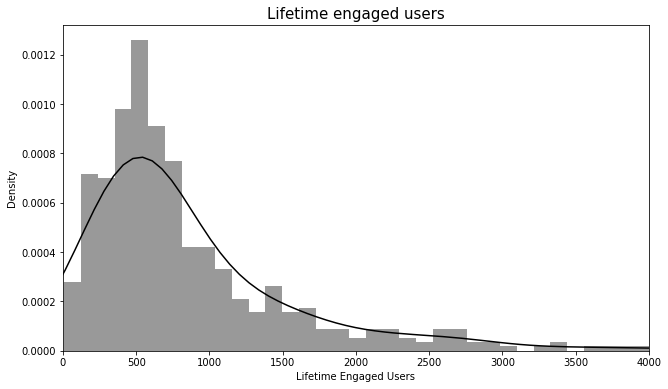

In [ ]:
plt.figure(figsize=(10.5,6))
sns.distplot(data['Lifetime Engaged Users'],bins=100,color='black')
plt.xlim(0,4000)
plt.title('Lifetime engaged users',fontsize=15)

The distribution is left skewed with most posts with engagement around 500 users, with the maximum being around 12000.

(0.0, 100000.0)

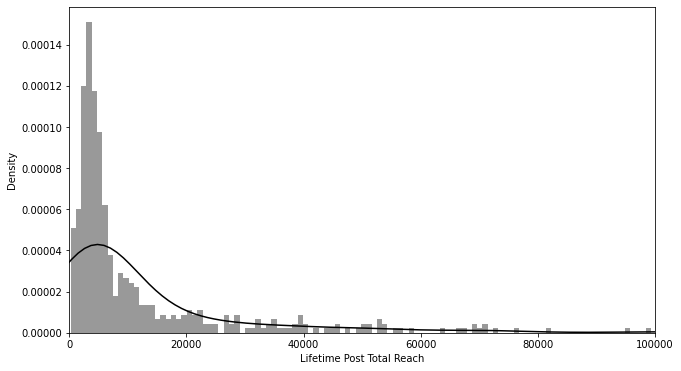

In [ ]:
plt.figure(figsize=(10.5,6))
sns.distplot(data['Lifetime Post Total Reach'],bins=200,color='black')
plt.xlim(0,100000)

Similarly, the distribution is left skewed, with majority of posts reaching 0-10000 users.

Text(0.5, 0.98, 'Engagement Metrics vs. Lifetime Engaged Users')

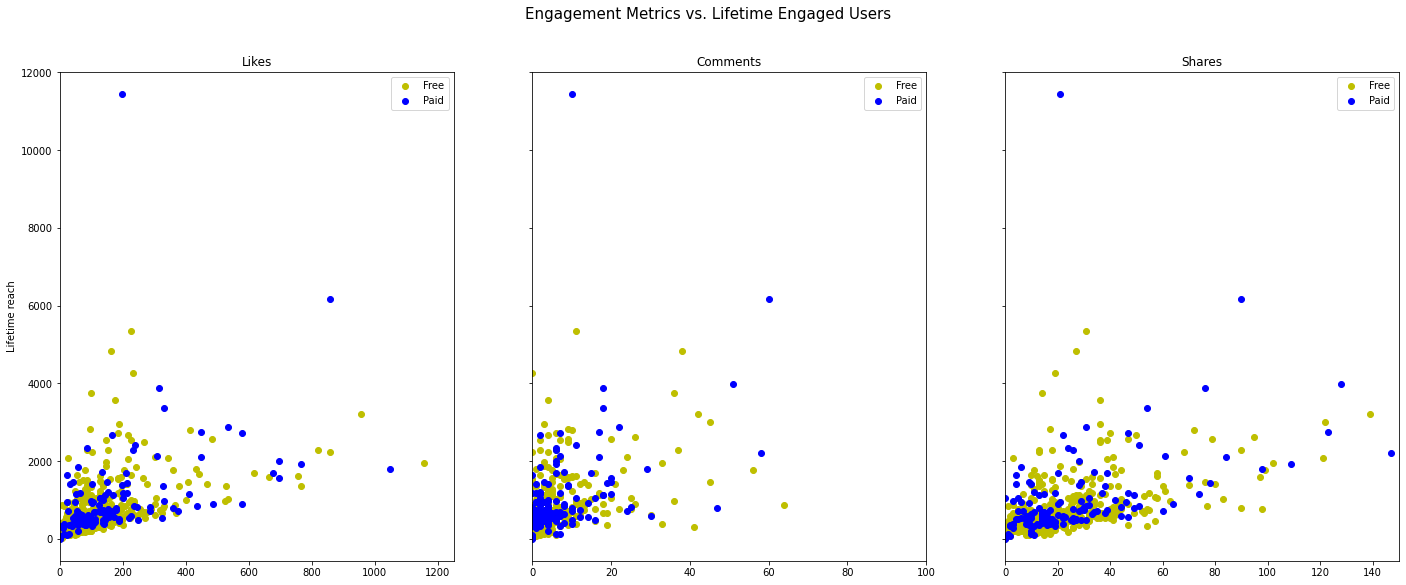

In [ ]:
fig, ax = plt.subplots(ncols=3,nrows=1,sharey=True,figsize=(24,9))

paid = data[data['Paid']==1]
free = data[data['Paid']==0]

ax[0].scatter(free['like'],free['Lifetime Engaged Users'],color='y')
ax[0].scatter(paid['like'],paid['Lifetime Engaged Users'],color='b')
ax[0].set_title('Likes')
ax[0].set_xlim(0,1250)
ax[0].legend(labels=['Free','Paid'])

ax[1].scatter(free['comment'],free['Lifetime Engaged Users'],color='y')
ax[1].scatter(paid['comment'],paid['Lifetime Engaged Users'],color='b')
ax[1].set_title('Comments')
ax[1].set_xlim(0,100)
ax[1].legend(labels=['Free','Paid'])

ax[2].scatter(free['share'],free['Lifetime Engaged Users'],color='y')
ax[2].scatter(paid['share'],paid['Lifetime Engaged Users'],color='b')
ax[2].set_title('Shares')
ax[2].set_xlim(0,150)
ax[2].legend(labels=['Free','Paid'])

ax[0].set_ylabel("Lifetime reach")

fig.suptitle('Engagement Metrics vs. Lifetime Engaged Users',fontsize=15)

There is a visible relationship between Like/Share and Total users reached, but the number of comments is little more random.

(0.0, 3000.0)

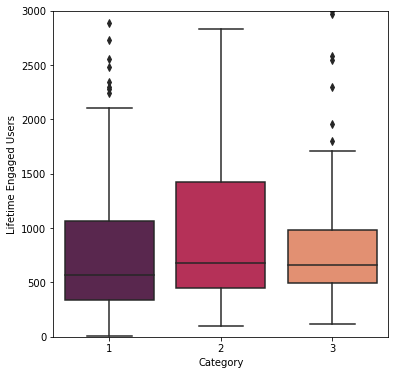

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x=data['Category'],y=data['Lifetime Engaged Users'],palette='rocket')
plt.ylim(0,3000)

(0.0, 5000.0)

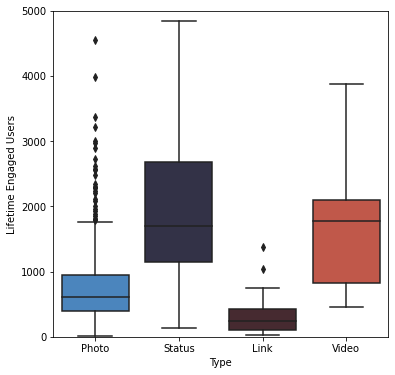

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x=data['Type'],y=data['Lifetime Engaged Users'],palette='icefire')
plt.ylim(0,5000)

(0.0, 5000.0)

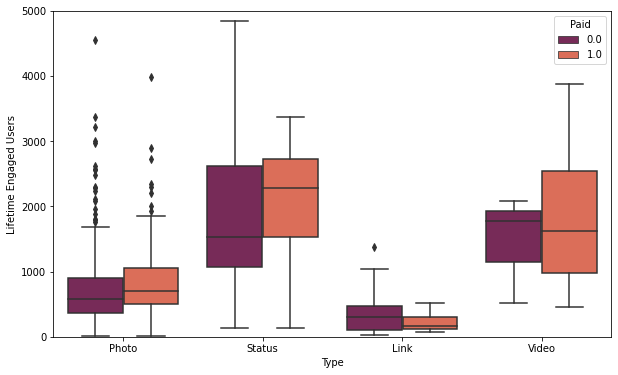

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Type'],y=data['Lifetime Engaged Users'],hue=data['Paid'],palette='rocket')
plt.ylim(0,5000)

Engagement for Status > Video > photo > Link

(-300.0, 6500.0)

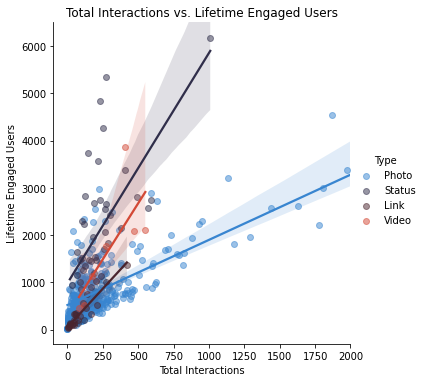

In [ ]:
sns.lmplot(x='Total Interactions',y='Lifetime Engaged Users',
           hue='Type',data=data,scatter_kws= {'alpha':0.5},palette='icefire')
plt.title('Total Interactions vs. Lifetime Engaged Users')
plt.xlim(-100,2000)
plt.ylim(-300,6500)

Interactions : Engaged Users ratio is higher for Photo than others

(-300.0, 6000.0)

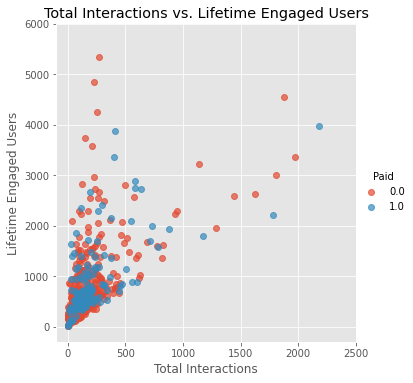

In [ ]:
plt.style.use('ggplot')
sns.lmplot(x='Total Interactions',y='Lifetime Engaged Users',
           hue='Paid',data=data,fit_reg=False,scatter_kws= {'alpha':0.7})
plt.title('Total Interactions vs. Lifetime Engaged Users')
plt.xlim(-100,2500)
plt.ylim(-300,6000)

(-300.0, 6500.0)

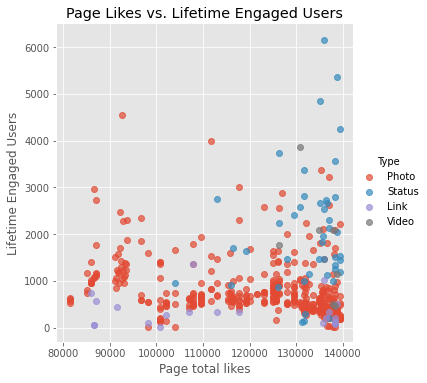

In [ ]:
plt.style.use('ggplot')
sns.lmplot(x='Page total likes',y='Lifetime Engaged Users',
           hue='Type',data=data,fit_reg=False,scatter_kws= {'alpha':0.7},)
plt.title('Page Likes vs. Lifetime Engaged Users')
# plt.xlim(-100,140000)
plt.ylim(-300,6500)

(0.0, 2300.0)

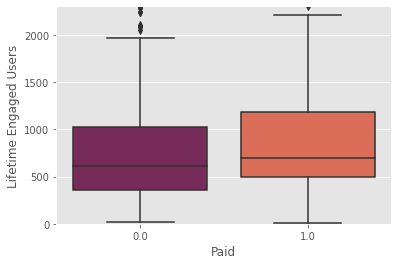

In [ ]:
sns.boxplot(x=data['Paid'],y=data['Lifetime Engaged Users'],palette='rocket')
plt.ylim(0,2300)

Paid posts have slightly higher engagement than non-paid posts.

Text(0.5, 1.0, 'Post Engagement by Weekday')

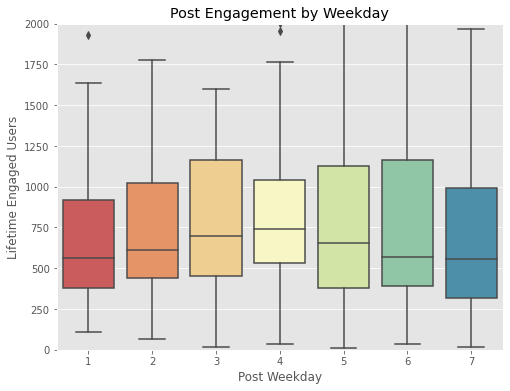

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Post Weekday'],y=data['Lifetime Engaged Users'],palette='Spectral')
plt.ylim(0,2000)
plt.title("Post Engagement by Weekday")

Text(0.5, 1.0, 'Post Engagement by Weekday')

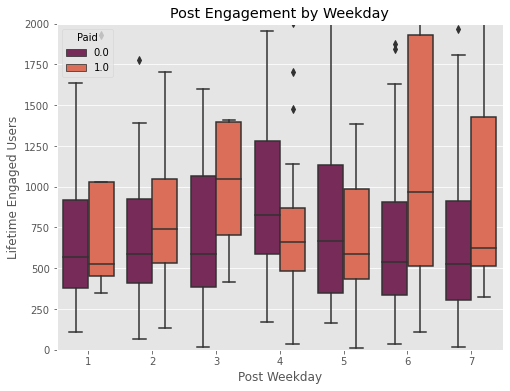

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Post Weekday'],y=data['Lifetime Engaged Users'],hue=data['Paid'],palette='rocket')
plt.ylim(0,2000)
plt.title("Post Engagement by Weekday")

Paid posts get higher engagement than non-paid posts.

Text(0.5, 1.0, 'Post likes by Weekday')

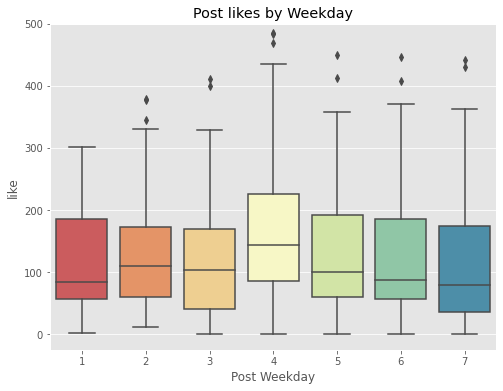

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Post Weekday'],y=data['like'],palette='Spectral')
plt.ylim(-25,500)
plt.title("Post likes by Weekday")

Text(0.5, 1.0, 'Post likes by Weekday')

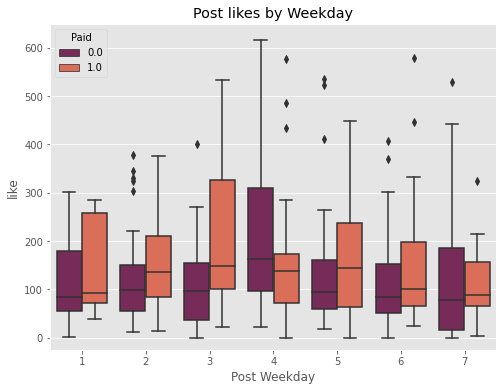

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Post Weekday'],y=data['like'],hue=data['Paid'],palette='rocket')
plt.ylim(-25,650)
plt.title("Post likes by Weekday")

Paid posts get higher likes than non-paid posts.

Text(0.5, 1.0, 'Post likes by Weekday')

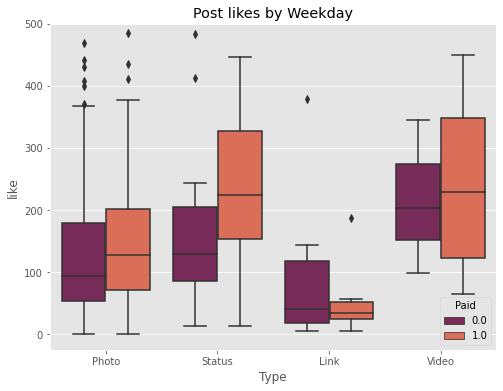

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Type'],y=data['like'],hue=data['Paid'],palette='rocket')
plt.ylim(-25,500)
plt.title("Post likes by Weekday")

Paid posts get higher likes in general.

(0.0, 500.0)

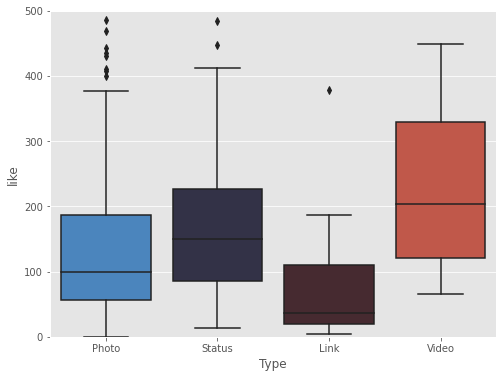

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Type'],y=data['like'],palette='icefire')
plt.ylim(0,500)

(0.0, 100.0)

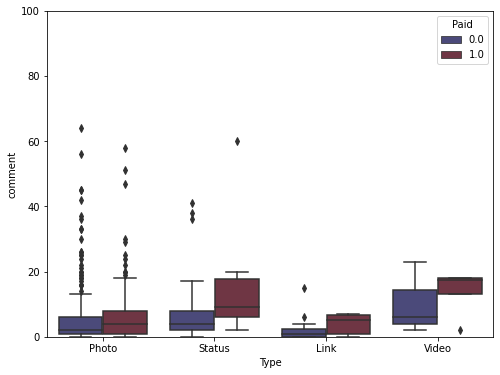

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Type'],y=data['comment'],hue=data['Paid'],palette='icefire')
plt.ylim(0,100)

(0.0, 500.0)

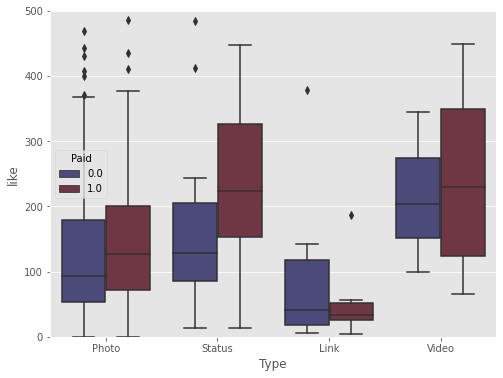

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Type'],y=data['like'],hue=data['Paid'],palette='icefire')
plt.ylim(0,500)

0.655758178788878


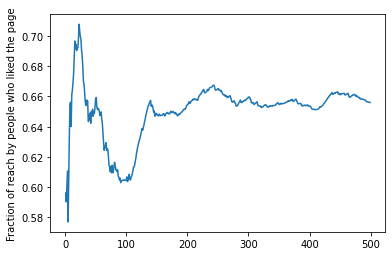

In [ ]:
a = data['Lifetime Post reach by people who like your Page']/data['Lifetime Post Total Reach']
new = []
for i in range(len(a)):
  new.append(np.mean(a[:i]))
plt.ylabel('Fraction of reach by people who liked the page')
plt.plot(new)
print(f"{np.mean(a)}")

65 % of total posts reach are people that have already liked the page.

0.7


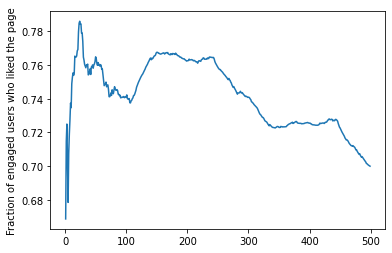

In [ ]:
a = data['Lifetime People who have liked your Page and engaged with your post']/data['Lifetime Engaged Users']

new = []
for i in range(len(a)):
  new.append(np.mean(a[:i]))

plt.ylabel('Fraction of engaged users who liked the page')

plt.plot(new)
print(f"{round(np.mean(a),2)}")

70% of total engagement in posts are from people that have already liked the page.

0.7005119084710254


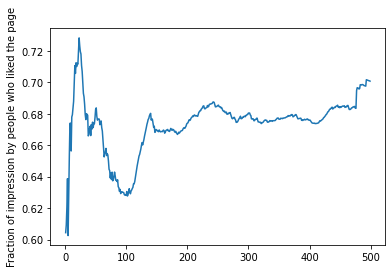

In [ ]:
a = data['Lifetime Post Impressions by people who have liked your Page']/data['Lifetime Post Total Impressions']
new = []
for i in range(len(a)):
  new.append(np.mean(a[:i]))
plt.ylabel('Fraction of impression by people who liked the page')
plt.plot(new)
print(f"{np.mean(a)}")

(0.0, 600.0)

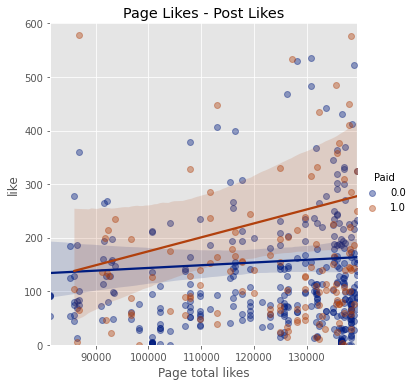

In [ ]:
sns.lmplot(x='Page total likes',y='like',
           hue='Paid',data=data,scatter_kws= {'alpha':0.4},palette='dark')
plt.title('Page Likes - Post Likes')
plt.ylim(0,600)

No increase in likes for non-paid posts, weak positive trend for paid posts.

In [ ]:
data

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


Relations between like comment and share

(0.0, 2100.0)

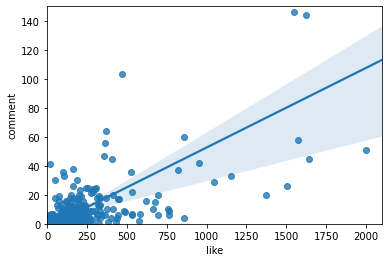

In [ ]:
sns.regplot(x="like",y="comment",data=data);
plt.ylim(0,150)
plt.xlim(0,2100)

(0.0, 220.0)

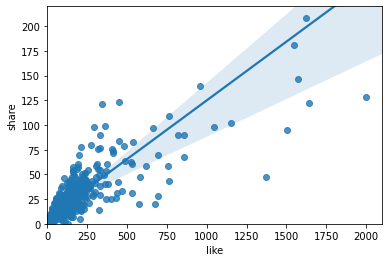

In [ ]:
sns.regplot(x="like",y="share",data=data);
plt.xlim(0,2100)
plt.ylim(0,220)

(0.0, 220.0)

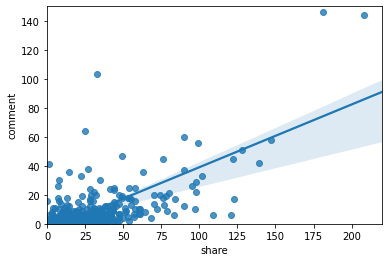

In [ ]:
sns.regplot(x="share",y="comment",data=data);
plt.ylim(0,150)
plt.xlim(0,220)

How much fraction of 'Reach', 'Impression' and 'Engagement' comes from people who liked the page?

Text(0, 0.5, 'Fraction of reach by people who liked the page')

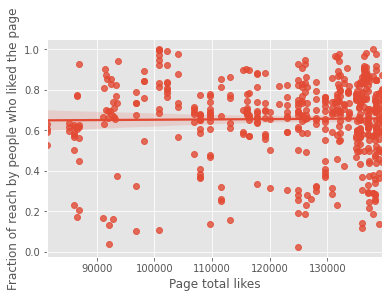

In [ ]:
a = data['Lifetime Post reach by people who like your Page']/data['Lifetime Post Total Reach']
sns.regplot(x="Page total likes",y=a, data=data);
plt.ylabel('Fraction of reach by people who liked the page')

Text(0, 0.5, 'Fraction of engaged users who liked the page')

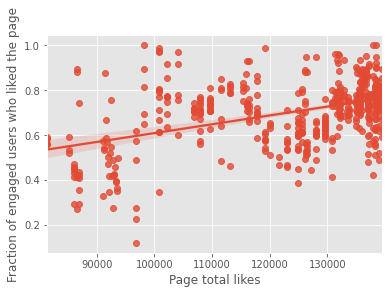

In [ ]:
a = data['Lifetime People who have liked your Page and engaged with your post']/data['Lifetime Engaged Users']
sns.regplot(x="Page total likes",y=a, data=data);
plt.ylabel('Fraction of engaged users who liked the page')

Text(0, 0.5, 'Fraction of impression by people who liked the page')

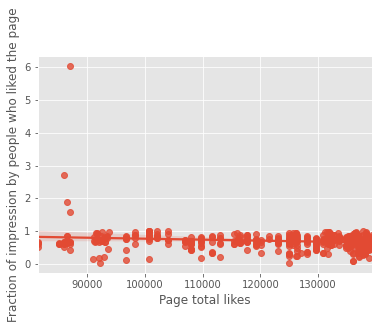

In [ ]:
a = data['Lifetime Post Impressions by people who have liked your Page']/data['Lifetime Post Total Impressions']
sns.regplot(x="Page total likes",y=a, data=data);
plt.ylabel('Fraction of impression by people who liked the page')

Which attributes are least affected and most affected by 'Paid'?

(0.0, 500.0)

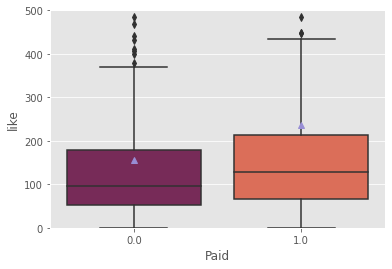

In [ ]:
sns.boxplot(x=data['Paid'],y=data['like'],showmeans=True, palette='rocket')
plt.ylim(0,500)


(0.0, 25.0)

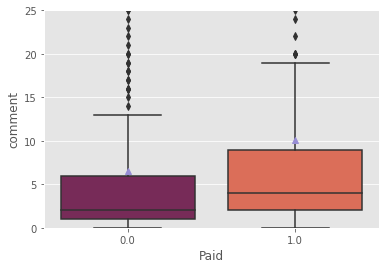

In [ ]:
sns.boxplot(x=data['Paid'],y=data['comment'],showmeans=True,palette='rocket')
plt.ylim(0,25)

(0.0, 100.0)

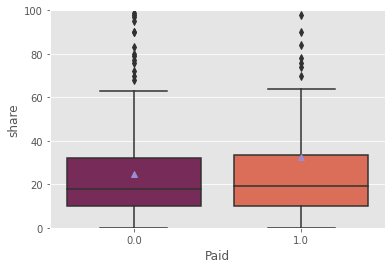

In [ ]:
sns.boxplot(x=data['Paid'],y=data['share'],showmeans=True,palette='rocket')
plt.ylim(0,100)


> Indented block



(0.0, 60000.0)

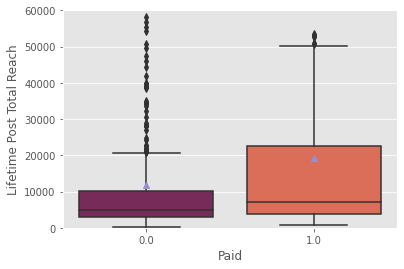

In [ ]:
sns.boxplot(x=data['Paid'],y=data['Lifetime Post Total Reach'],showmeans=True,palette='rocket')
plt.ylim(0,60000)

(0.0, 2500.0)

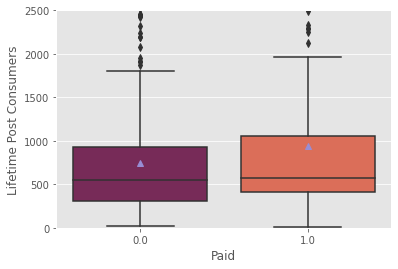

In [ ]:
sns.boxplot(x=data['Paid'],y=data['Lifetime Post Consumers'],showmeans=True,palette='rocket')
plt.ylim(0,2500)

(0.0, 100000.0)

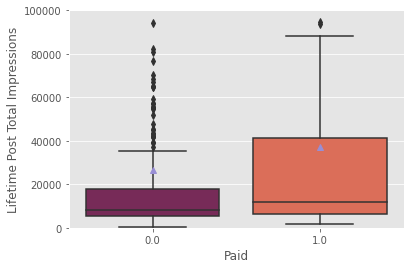

In [ ]:
sns.boxplot(x=data['Paid'],y=data['Lifetime Post Total Impressions'],showmeans=True,palette='rocket')
plt.ylim(0,100000)

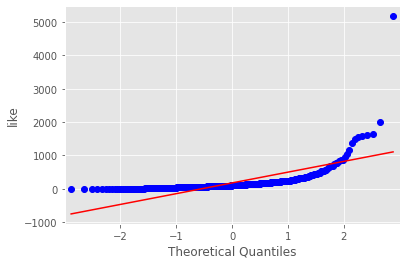

In [ ]:
# QQ Plot

qqplot(data['like'], line='s')
plt.ylabel('like')
plt.show()

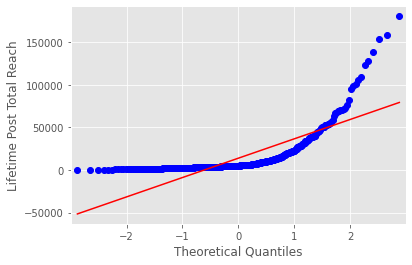

In [ ]:
qqplot(data['Lifetime Post Total Reach'], line='s')
plt.ylabel('Lifetime Post Total Reach')
plt.show()

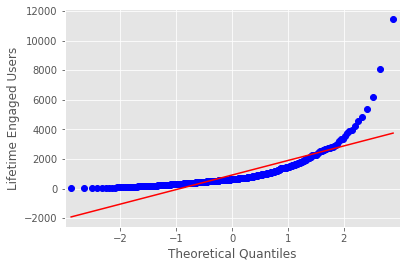

In [ ]:
qqplot(data['Lifetime Engaged Users'], line='s')
plt.ylabel('Lifetime Engaged Users')
plt.show()

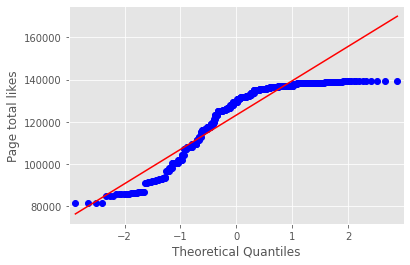

In [ ]:
qqplot(data['Page total likes'], line='s')
plt.ylabel('Page total likes')
plt.show()

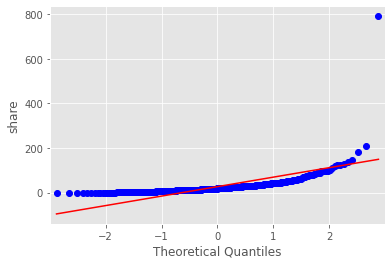

In [ ]:
qqplot(data['share'], line='s')
plt.ylabel('share')
plt.show()

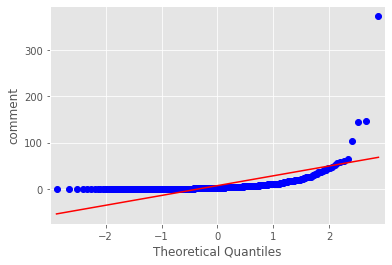

In [ ]:
qqplot(data['comment'], line='s')
plt.ylabel('comment')
plt.show()

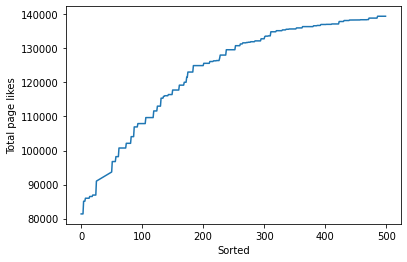

In [ ]:
data1 = data.sort_values('Page total likes')
data1 = data1.reset_index(drop=True)
plt.ylabel('Total page likes')
plt.xlabel('Sorted')
plt.plot(data1['Page total likes'])

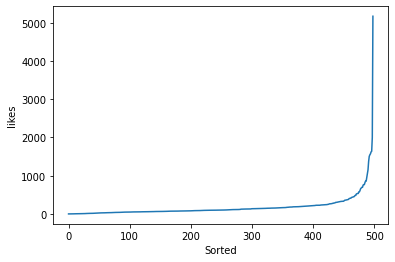

In [ ]:
data1 = data.sort_values('like')
data1 = data1.reset_index(drop=True)
a = data1['like']
plt.ylabel('likes')
plt.xlabel('Sorted')
plt.plot(a)

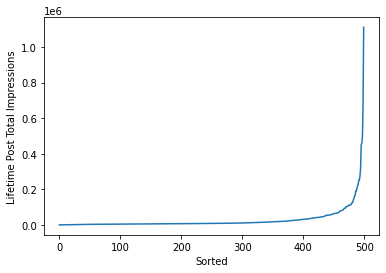

In [ ]:
data1 = data.sort_values('Lifetime Post Total Impressions')
data1 = data1.reset_index(drop=True)
a = data1['Lifetime Post Total Impressions']
plt.ylabel('Lifetime Post Total Impressions')
plt.xlabel('Sorted')
plt.plot(a)


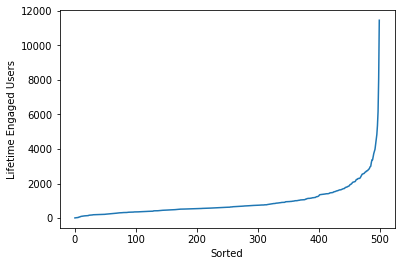

In [ ]:
data1 = data.sort_values('Lifetime Engaged Users')
data1 = data1.reset_index(drop=True)
a = data1['Lifetime Engaged Users']
plt.ylabel('Lifetime Engaged Users')
plt.xlabel('Sorted')
plt.plot(a)


In [ ]:
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


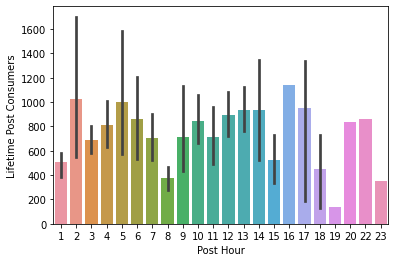

In [ ]:
ax = sns.barplot(x="Post Hour", y="Lifetime Post Consumers", data=data)

Influence of hour on lifetime consumers


Text(0, 0.5, 'Life Time Post Consumers')

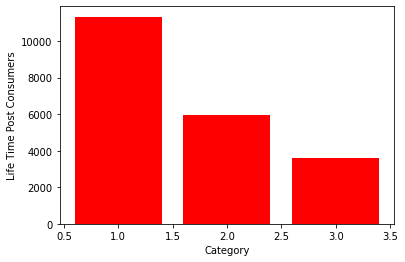

In [ ]:
plt.bar("Category","Lifetime Post Consumers", color="Red",data=data)
plt.xlabel("Category")
plt.ylabel("Life Time Post Consumers")


Influence of category on life time post consumers

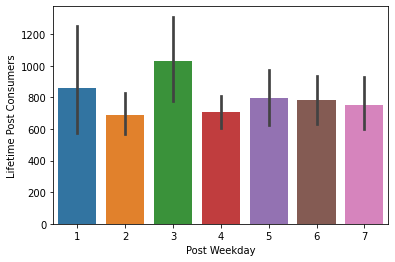

In [ ]:
ax = sns.barplot(x="Post Weekday", y="Lifetime Post Consumers", data=data)

Influence of weekday on life time post consumers

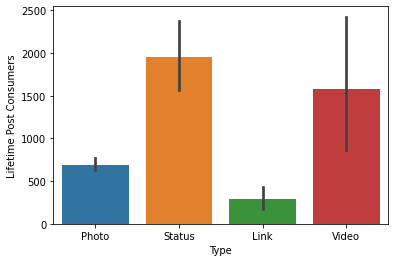

In [ ]:
ax = sns.barplot(x="Type", y="Lifetime Post Consumers", data=data)

Influence of Type on life time post consumers

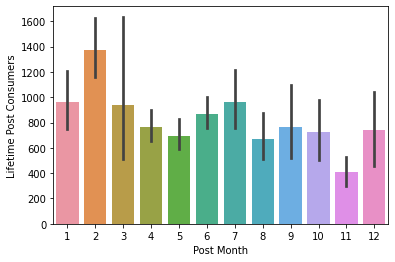

In [ ]:
ax = sns.barplot(x="Post Month", y="Lifetime Post Consumers", data=data)

Influence of month on lifetime post consumers

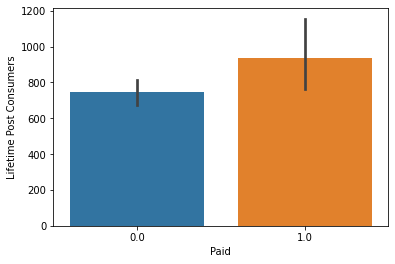

In [ ]:
ax = sns.barplot(x="Paid", y="Lifetime Post Consumers", data=data)

Influence of paid on lifetime post time consumers

Text(0.5, 1.0, 'Share - Post')

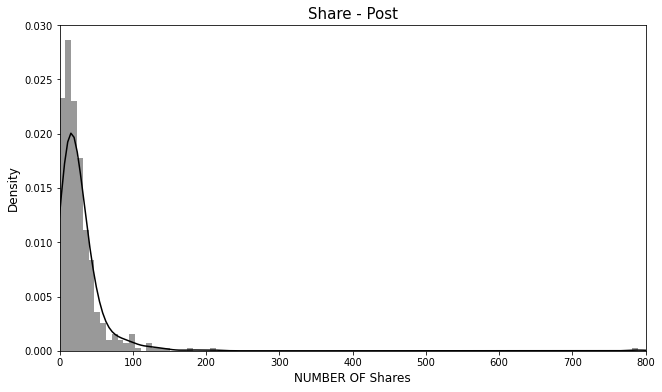

In [ ]:
plt.figure(figsize=(10.5,6))
sns.distplot(data['share'],bins=100,color='black',kde=True)
plt.xlim(0,800)
plt.xlabel("NUMBER OF Shares",fontsize=12)
plt.ylabel('Density',fontsize=12)
plt.title('Share - Post',fontsize=15)

Text(0.5, 1.0, 'Lifetime Post Consumers')

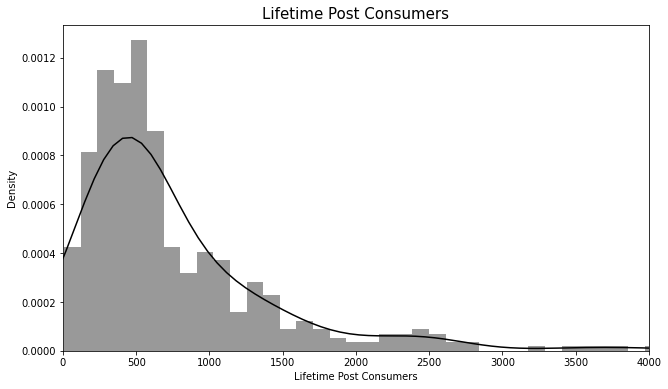

In [ ]:
plt.figure(figsize=(10.5,6))
sns.distplot(data['Lifetime Post Consumers'],bins=100,color='black')
plt.xlim(0,4000)
plt.title('Lifetime Post Consumers',fontsize=15)

The distribution is left skewed with most posts  around 500 users, with the maximum being around 12000

Text(0.5, 0.98, 'Engagement Metrics vs. Lifetime Post Consumers')

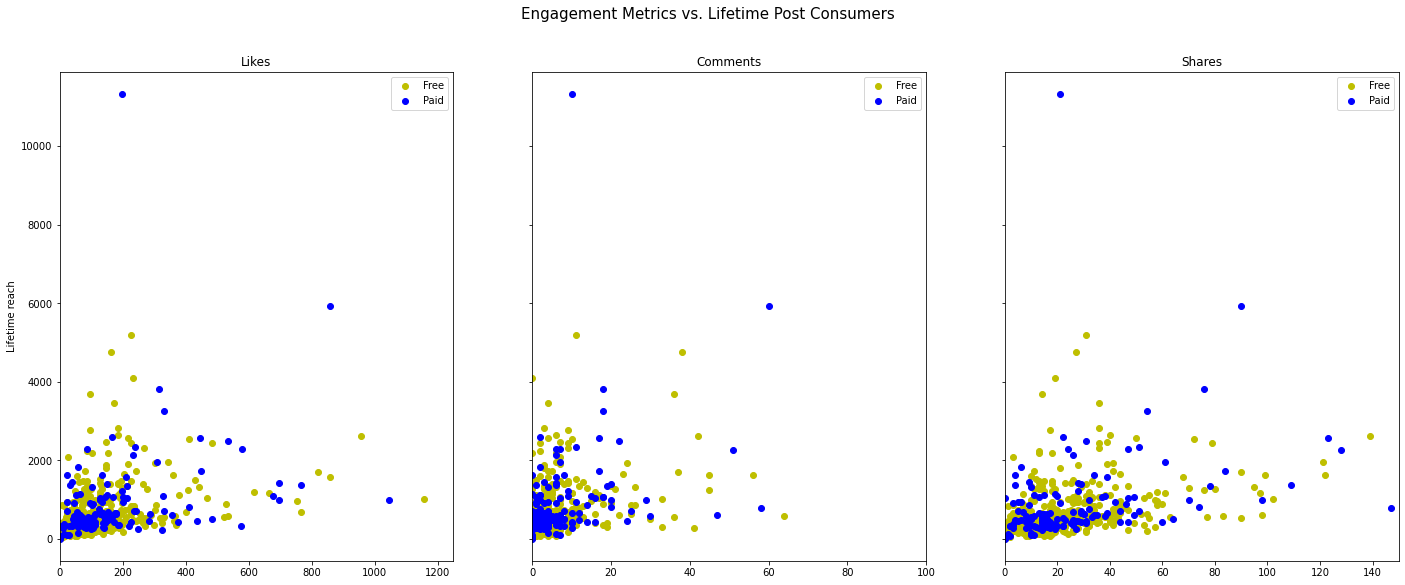

In [ ]:
fig, ax = plt.subplots(ncols=3,nrows=1,sharey=True,figsize=(24,9))

paid = data[data['Paid']==1]
free = data[data['Paid']==0]

ax[0].scatter(free['like'],free['Lifetime Post Consumers'],color='y')
ax[0].scatter(paid['like'],paid['Lifetime Post Consumers'],color='b')
ax[0].set_title('Likes')
ax[0].set_xlim(0,1250)
ax[0].legend(labels=['Free','Paid'])

ax[1].scatter(free['comment'],free['Lifetime Post Consumers'],color='y')
ax[1].scatter(paid['comment'],paid['Lifetime Post Consumers'],color='b')
ax[1].set_title('Comments')
ax[1].set_xlim(0,100)
ax[1].legend(labels=['Free','Paid'])

ax[2].scatter(free['share'],free['Lifetime Post Consumers'],color='y')
ax[2].scatter(paid['share'],paid['Lifetime Post Consumers'],color='b')
ax[2].set_title('Shares')
ax[2].set_xlim(0,150)
ax[2].legend(labels=['Free','Paid'])

ax[0].set_ylabel("Lifetime reach")

fig.suptitle('Engagement Metrics vs. Lifetime Post Consumers',fontsize=15)

(0.0, 5000.0)

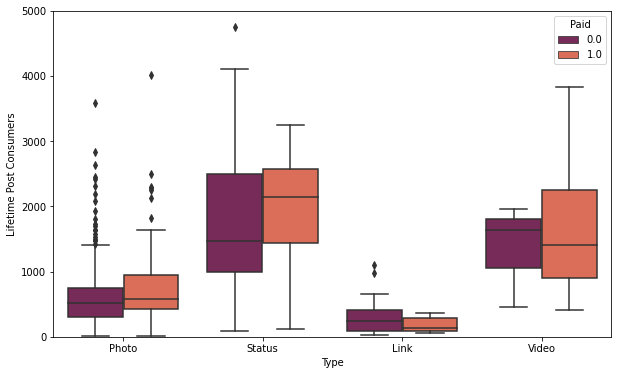

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Type'],y=data['Lifetime Post Consumers'],hue=data['Paid'],palette='rocket')
plt.ylim(0,5000)

Engagement for Status > Video > photo > Link

(-300.0, 6500.0)

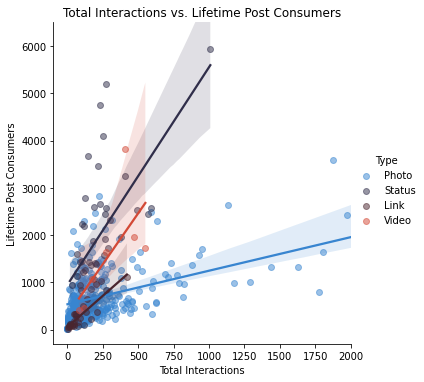

In [ ]:
sns.lmplot(x='Total Interactions',y='Lifetime Post Consumers',
           hue='Type',data=data,scatter_kws= {'alpha':0.5},palette='icefire')
plt.title('Total Interactions vs. Lifetime Post Consumers')
plt.xlim(-100,2000)
plt.ylim(-300,6500)

Interactions : consumers ratio is higher for Photo than others

(-300.0, 6000.0)

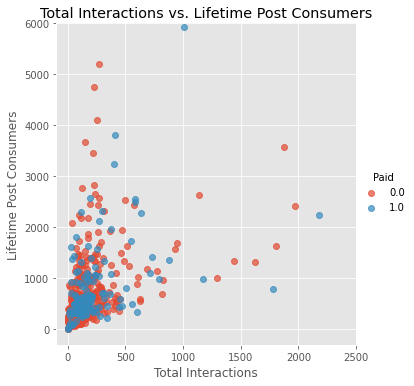

In [ ]:
plt.style.use('ggplot')
sns.lmplot(x='Total Interactions',y='Lifetime Post Consumers',
           hue='Paid',data=data,fit_reg=False,scatter_kws= {'alpha':0.7})
plt.title('Total Interactions vs. Lifetime Post Consumers')
plt.xlim(-100,2500)
plt.ylim(-300,6000)

(0.0, 500.0)

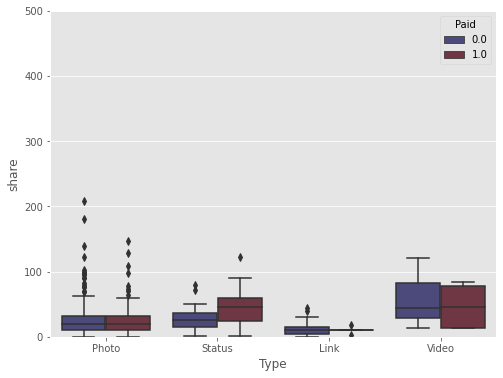

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Type'],y=data['share'],hue=data['Paid'],palette='icefire')
plt.ylim(0,500)

Text(0.5, 1.0, 'Shares in Weekday')

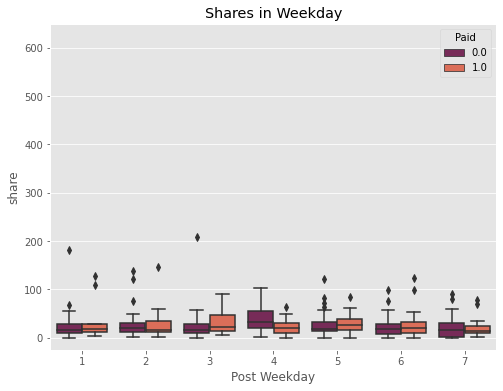

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Post Weekday'],y=data['share'],hue=data['Paid'],palette='rocket')
plt.ylim(-25,650)
plt.title("Shares in Weekday")

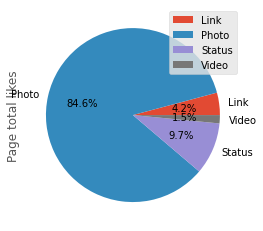

In [ ]:
data.groupby(['Type']).sum().plot(kind='pie', y='Page total likes', autopct='%1.1f%%')

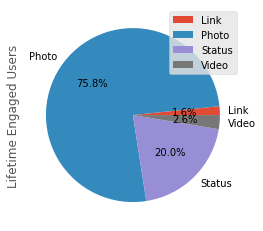

In [ ]:
data.groupby(['Type']).sum().plot(kind='pie', y='Lifetime Engaged Users', autopct='%1.1f%%')

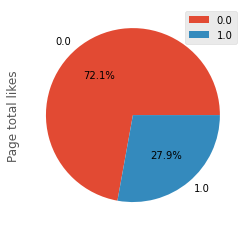

In [ ]:
data.groupby(['Paid']).sum().plot(kind='pie', y='Page total likes', autopct='%1.1f%%')

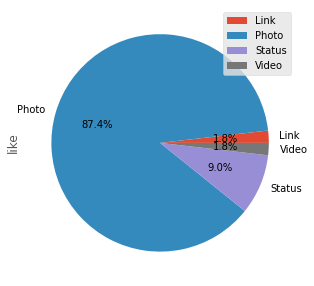

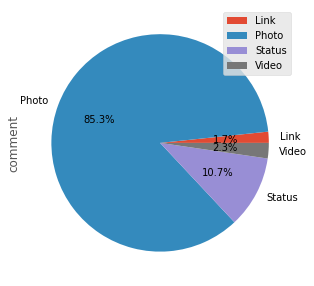

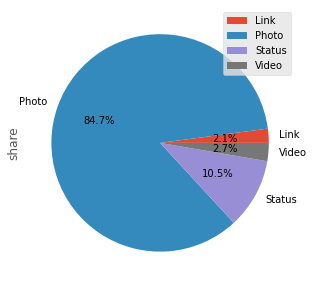

In [ ]:

data.groupby(['Type']).sum().plot(kind='pie', y='like', autopct='%1.1f%%', figsize=(10, 5))
data.groupby(['Type']).sum().plot(kind='pie', y='comment', autopct='%1.1f%%', figsize=(10, 5))
data.groupby(['Type']).sum().plot(kind='pie', y='share', autopct='%1.1f%%', figsize=(10, 5))

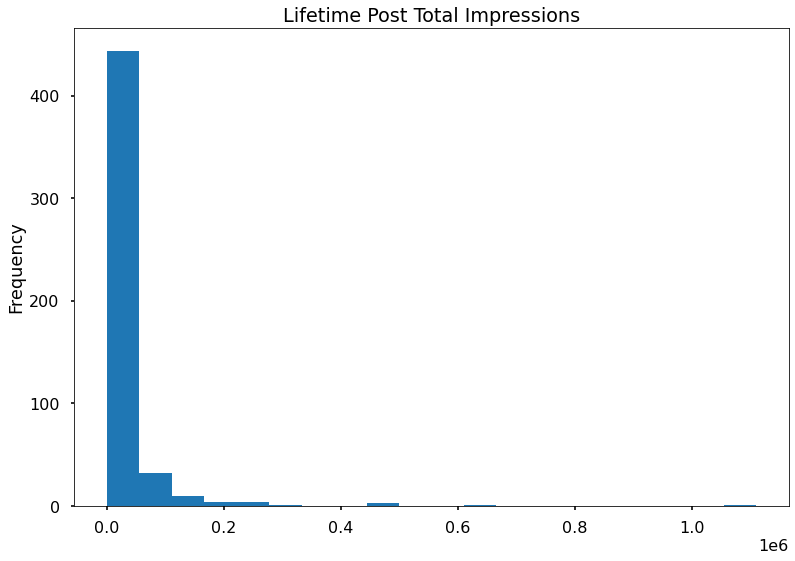

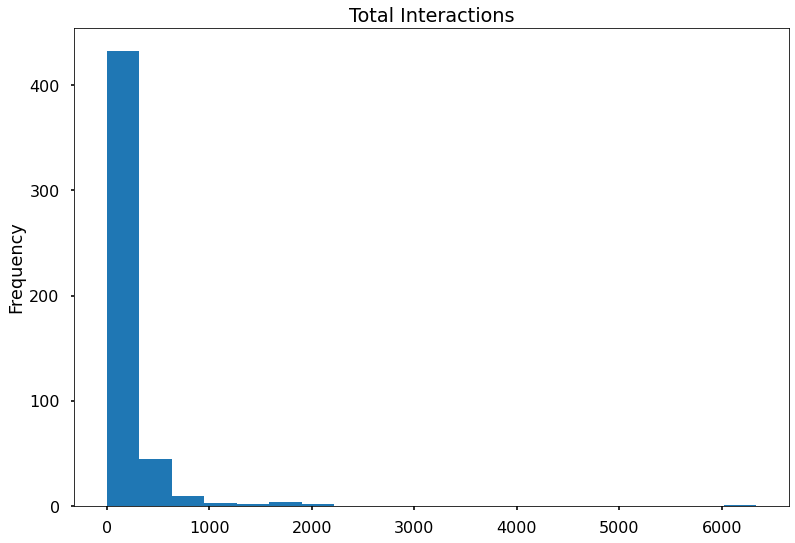

In [ ]:
for name in ['Lifetime Post Total Impressions','Total Interactions']:
    data_pca[name].plot(kind='hist',title=name,bins=20)
    plt.show()

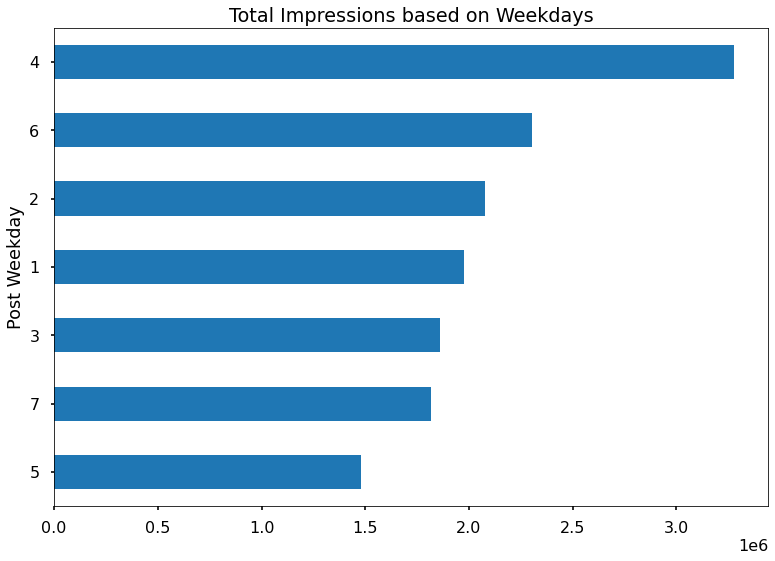

In [ ]:
data_count = data.groupby("Post Weekday")["Lifetime Post Total Impressions"].sum().sort_values()
data_count.plot(kind="barh",title='Total Impressions based on Weekdays')